In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import matplotlib
matplotlib.rcParams['figure.dpi'] = 700

In [5]:
filename = "../data/long_to_plot_fc_ICU_STAT.csv"

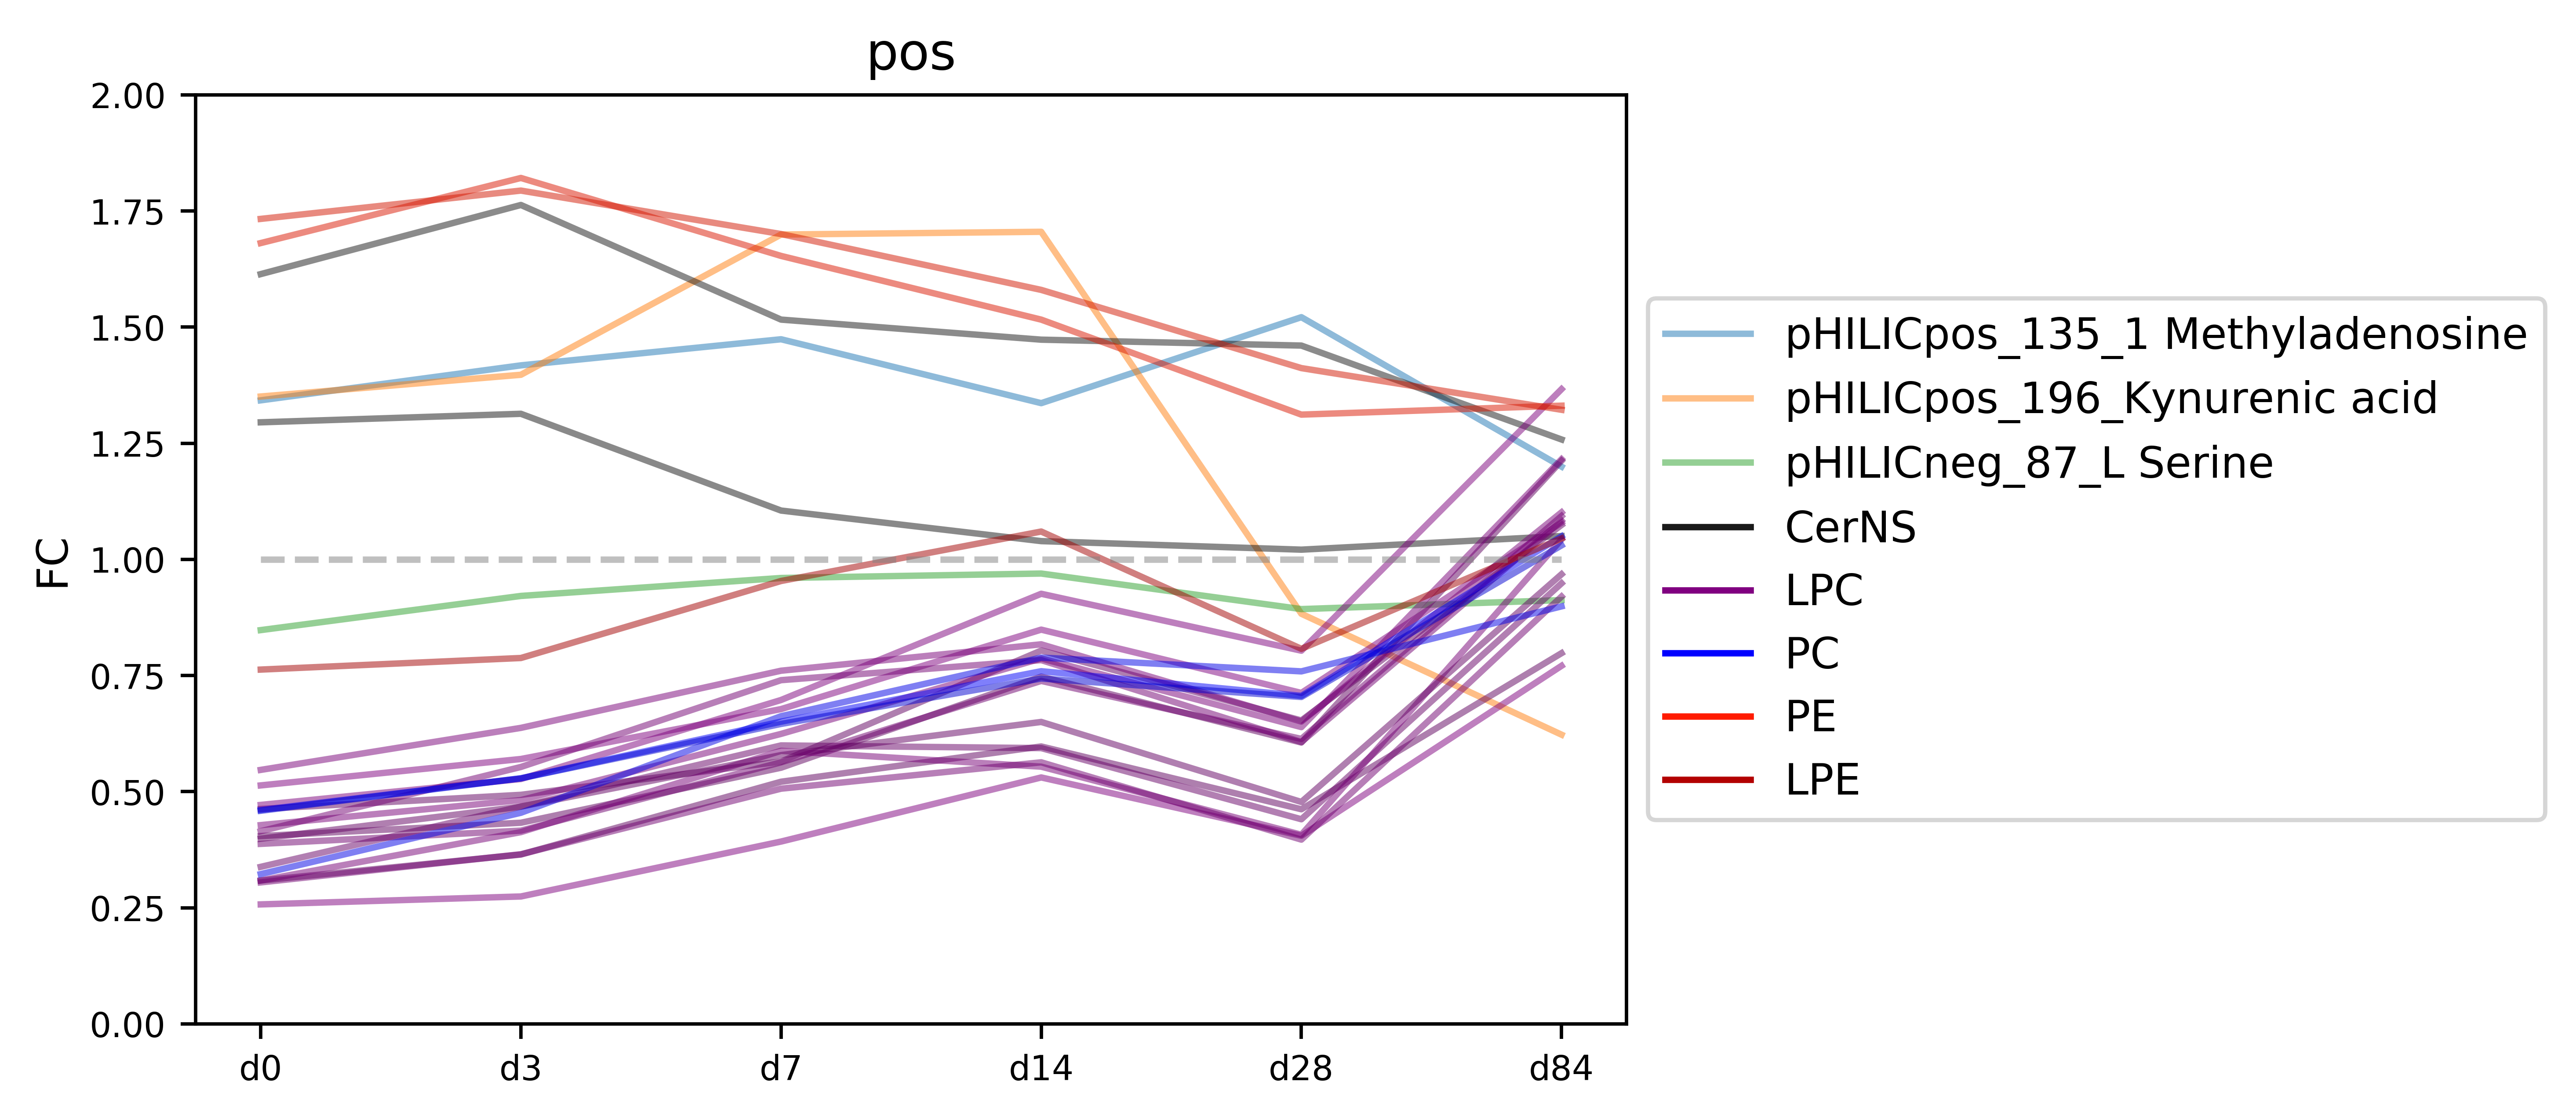

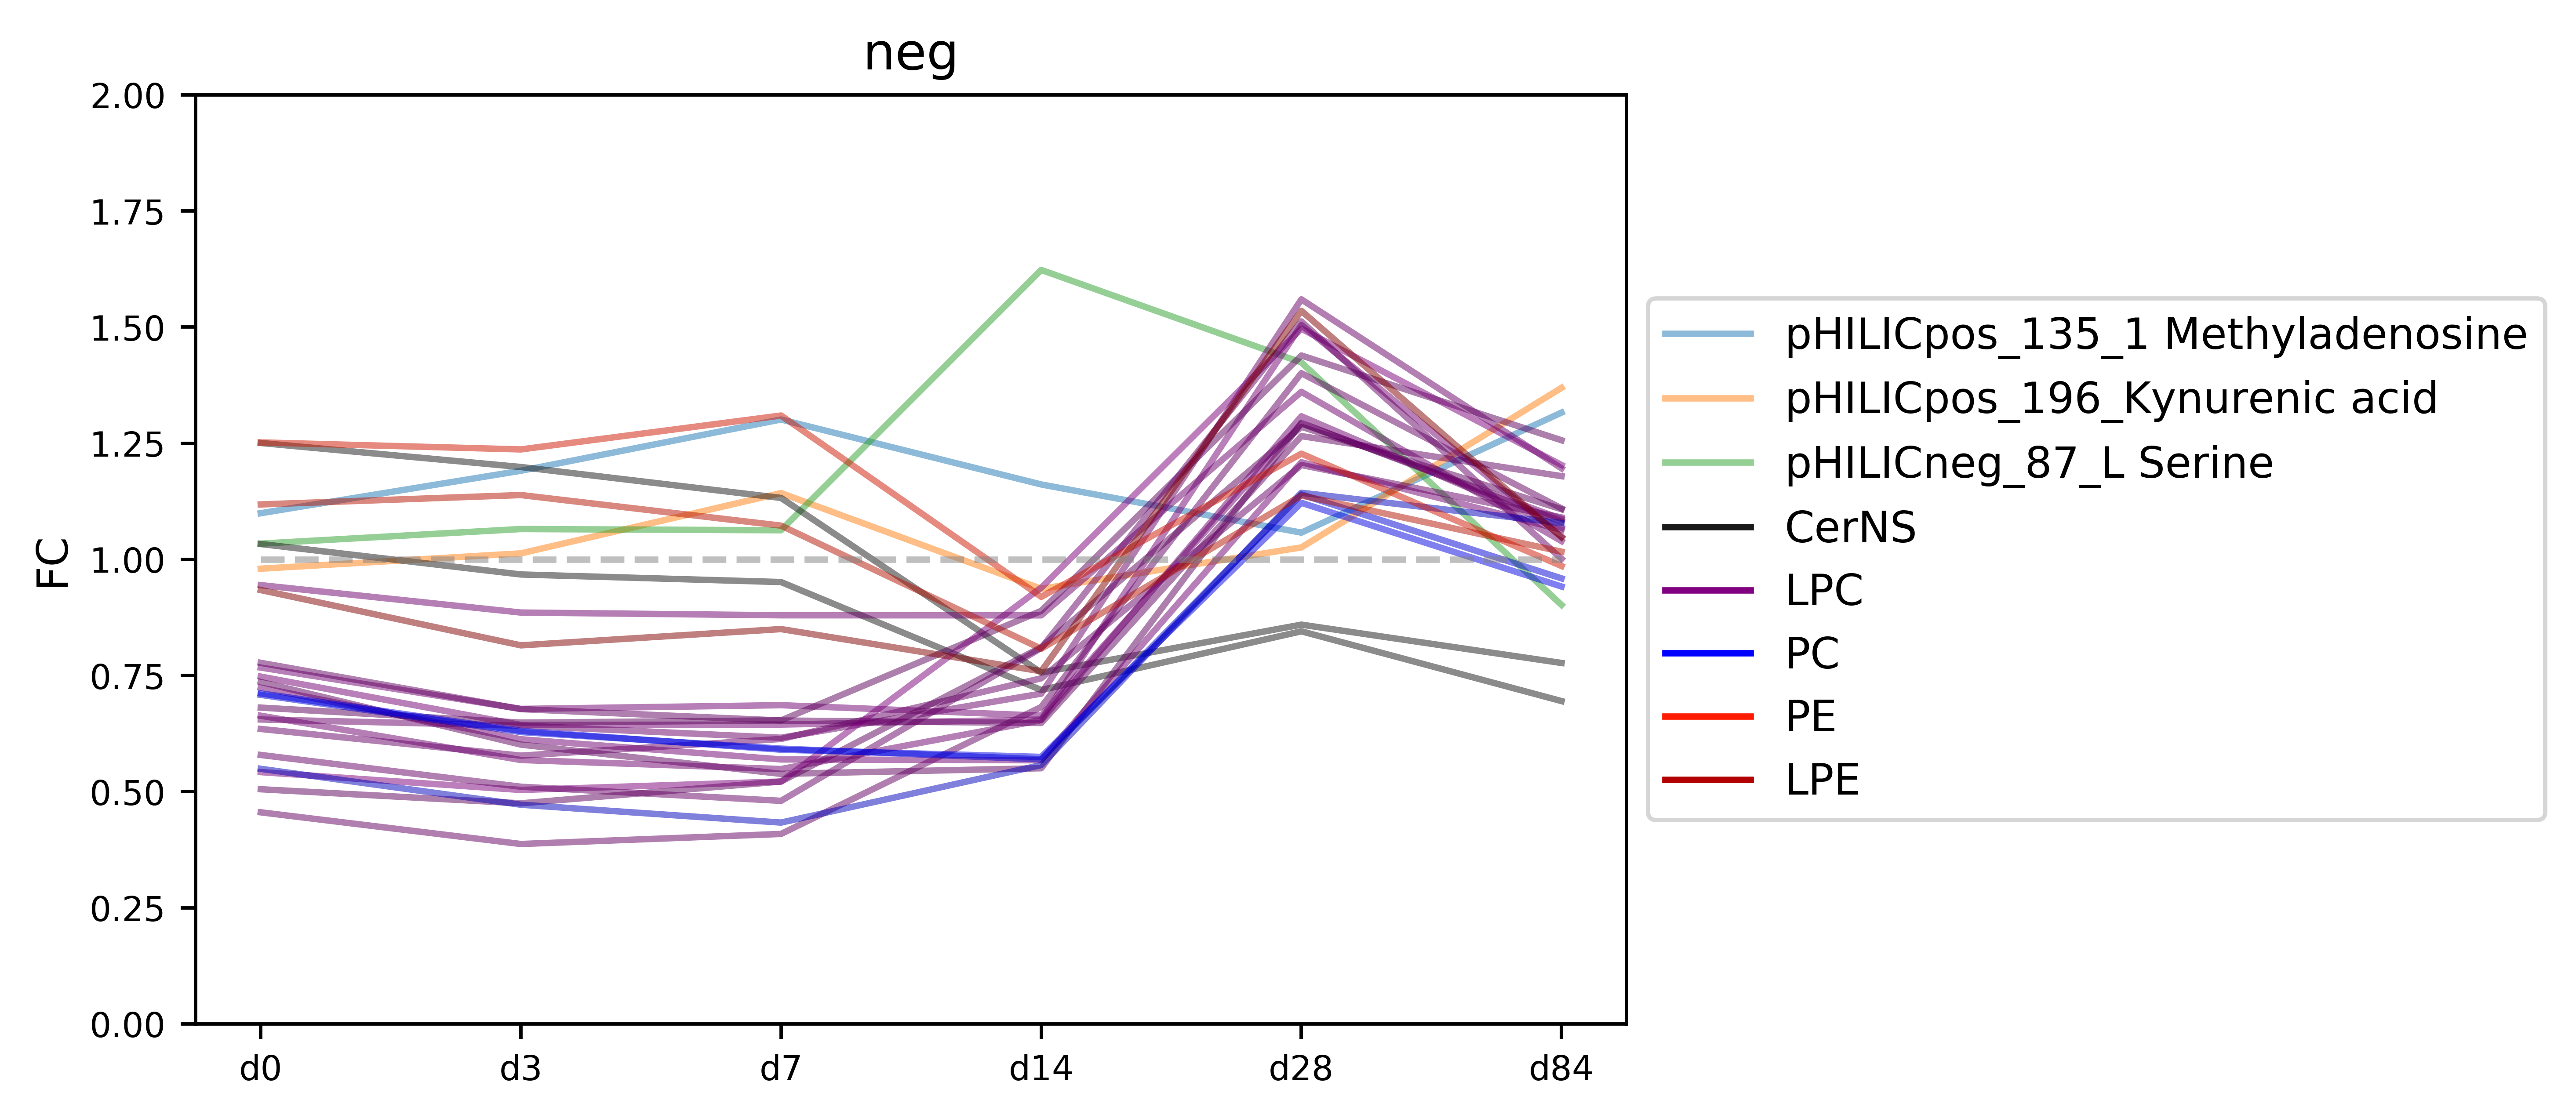

In [7]:
stats = ["pos","neg"]
color_code = {"_LPC":(.502,0,.502),"_PC":(0,0,1),"_Cer_NS":(.1,.1,.1),"_LPE":(.7021,0,0),"_PE":(1,.105,0)}
for stat in stats:
    legend_entries = []
    dat = pd.read_csv(filename.replace("STAT",stat),index_col=0)
    xvals = [x for x in range(len(dat.columns.values))]
    plt.figure()
    for index,row in dat.iterrows():
        if any(k in index for k in color_code):  
            for k in color_code:
                if k in index:
                    color = tuple(color_code[k])
                    if k not in legend_entries:
                        plt.plot([0,0],[0,0],color=color,label=k.replace("_",""))
                        legend_entries.append(k)
                    color = tuple(np.array(color) * (.3*np.random.random() + .70))
            plt.plot(xvals,row.values,color=color,alpha=0.5)
            #plt.scatter(xvals,row.values,color=color)
            
        else:
            plt.plot(xvals,row.values,label=index,alpha=0.5)
            #plt.scatter(xvals,row.values)

    plt.title(stat)
    plt.xticks(xvals,labels=dat.columns.values,fontsize=8)
    plt.yticks(fontsize=8)
    plt.ylabel("FC")
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim((0,2))
    plt.plot([min(xvals),max(xvals)],[1.0,1.0],color="grey",alpha=0.5,ls="--")